In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

In [2]:
ws = 'data/tut00'
name = 'ex02b'
exe_name = os.path.abspath('../mf6.2.1/bin/mf6')

In [3]:
# create simulation
sim = flopy.mf6.MFSimulation(sim_name=name, exe_name=exe_name, sim_ws=ws)

# create tdis package
tdis = flopy.mf6.ModflowTdis(sim)

# create iterative model solution
ims = flopy.mf6.ModflowIms(sim)

In [4]:
gwf = flopy.mf6.ModflowGwf(sim, modelname=name)

In [5]:
nlay, nrow, ncol = 3, 21, 20
delr = delc = 500.
top = 400.
botm = [220, 200, 0]

In [6]:
dis = flopy.mf6.ModflowGwfdis(gwf, nlay=nlay, nrow=nrow, ncol=ncol,
                              delr=delr, delc=delc,
                              top=top, botm=botm)



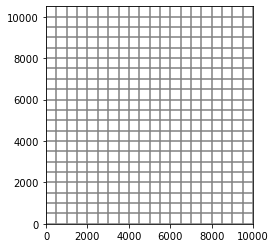

In [7]:
mm = flopy.plot.PlotMapView(model=gwf)
mm.plot_grid()

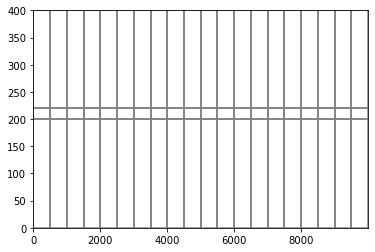

In [8]:
xs = flopy.plot.PlotCrossSection(model=gwf, line={'row': 10})
xs.plot_grid()

In [9]:
ic = flopy.mf6.ModflowGwfic(gwf, strt=320.)

In [10]:
kh = [50, 0.01, 200]
kv = [10, 0.01, 20]
icelltype = [1, 0, 0]

In [11]:
npf = flopy.mf6.ModflowGwfnpf(gwf, 
                              save_specific_discharge=True,
                              icelltype=icelltype,
                              k=kh,
                              k33=kv)

In [12]:
rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=0.005)

In [13]:
wel_spd = {0: [[(2, 10, 9), -150000]]}
wel = flopy.mf6.ModflowGwfwel(gwf, print_input=True,
                              stress_period_data=wel_spd)

In [14]:
riv_spd = {0: [[(0, i, 19), 320, 1e5, 318] for i in range(nrow)]}
riv_spd

{0: [[(0, 0, 19), 320, 100000.0, 318],
  [(0, 1, 19), 320, 100000.0, 318],
  [(0, 2, 19), 320, 100000.0, 318],
  [(0, 3, 19), 320, 100000.0, 318],
  [(0, 4, 19), 320, 100000.0, 318],
  [(0, 5, 19), 320, 100000.0, 318],
  [(0, 6, 19), 320, 100000.0, 318],
  [(0, 7, 19), 320, 100000.0, 318],
  [(0, 8, 19), 320, 100000.0, 318],
  [(0, 9, 19), 320, 100000.0, 318],
  [(0, 10, 19), 320, 100000.0, 318],
  [(0, 11, 19), 320, 100000.0, 318],
  [(0, 12, 19), 320, 100000.0, 318],
  [(0, 13, 19), 320, 100000.0, 318],
  [(0, 14, 19), 320, 100000.0, 318],
  [(0, 15, 19), 320, 100000.0, 318],
  [(0, 16, 19), 320, 100000.0, 318],
  [(0, 17, 19), 320, 100000.0, 318],
  [(0, 18, 19), 320, 100000.0, 318],
  [(0, 19, 19), 320, 100000.0, 318],
  [(0, 20, 19), 320, 100000.0, 318]]}

In [15]:
riv = flopy.mf6.ModflowGwfriv(gwf, stress_period_data=riv_spd)

In [16]:
hname = '{}.hds'.format(name)
cname = '{}.cbc'.format(name)
oc = flopy.mf6.ModflowGwfoc(gwf, budget_filerecord=cname,
                            head_filerecord=hname,
                            saverecord=[('HEAD', 'ALL'), ('BUDGET', 'ALL')])



In [17]:
gwf.name_file.save_flows = True

In [18]:
sim.write_simulation()
sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims_-1...
  writing model ex02b...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package rcha...
    writing package wel_0...
INFORMATION: maxbound in ('gwf6', 'wel', 'dimensions') changed to 1 based on size of stress_period_data
    writing package riv_0...
INFORMATION: maxbound in ('gwf6', 'riv', 'dimensions') changed to 21 based on size of stress_period_data
    writing package oc...
FloPy is using the following  executable to run the model: C:\Users\dan_b\modflow\mf6.2.1\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 08:24:05 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey

(True, [])

In [19]:
fpth = os.path.join(ws, hname)
hobj = flopy.utils.HeadFile(fpth)

In [20]:
hds = hobj.get_data()

In [21]:
fpth = os.path.join(ws, cname)
cobj = flopy.utils.CellBudgetFile(fpth, precision=hobj.precision)

In [22]:
cobj.list_unique_records()

RECORD           IMETH
----------------------
FLOW-JA-FACE         1
DATA-SPDIS           6
WEL                  6
RIV                  6
RCH                  6


In [23]:
spd = cobj.get_data(text='DATA-SPDIS')[0]

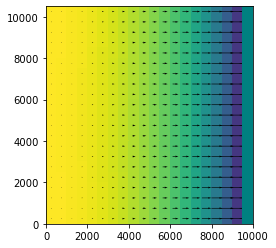

In [24]:
mm = flopy.plot.PlotMapView(model=gwf, layer=0)
mm.plot_array(hds)
mm.plot_specific_discharge(spd)
mm.plot_bc('RIV')
mm.plot_bc('WEL')